In [1]:
import sys
import numpy as np
from netCDF4 import Dataset
#sys.path.insert(1, '/ascldap/users/lcheung/local/Git/amrwind-frontend')
#import amrwind_frontend as amrwind
#import postproamrwindsample as ppsample
import math

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/projects/wind_uq/lcheung/naluhelperscripts/venv/lib/python2.7/site-packages/subprocess32.py:149: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


In [2]:
basedir     = '/gpfs/lcheung/TCF/JoukowskyDisk_AMRWind/V27/test/'
samplefile  = 'post_processing/sampling00000.nc'
wtgfilename = 'post_processing/actuator00000/WTG01.nc'
group       = 'WTG01'
Uinf        = 1
rotorR      = 13.5
Nb          = 3
rho         = 1.225
num_points_r= 40

In [3]:
# Load the data
WTGdat   = Dataset(basedir+'/'+wtgfilename)
num_points_t = WTGdat[group].dimensions['num_actuator_points'].size/num_points_r

In [4]:
dr = 1.0/num_points_r
r  = np.arange(0.5*dr, 1.0, dr)
fn = WTGdat[group]['f_normal'][-1,:]
ft = WTGdat[group]['f_theta'][-1,:]

In [5]:
# Load the Sorensen data
cn_sorensen=np.loadtxt('./cn_sorenson/green', delimiter=',')
ct_sorensen=np.loadtxt('./ct_sorenson/green', delimiter=',')

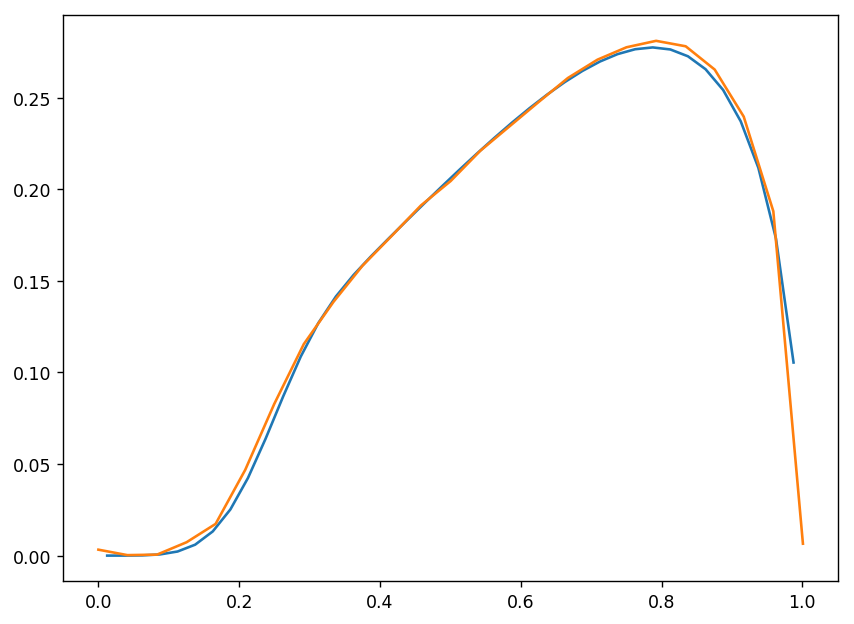

In [6]:
plt.figure(figsize=(8,6),dpi=125)
plt.plot(r,fn*(2*np.pi*r/Nb))
plt.plot(cn_sorensen[:,0], cn_sorensen[:,1])

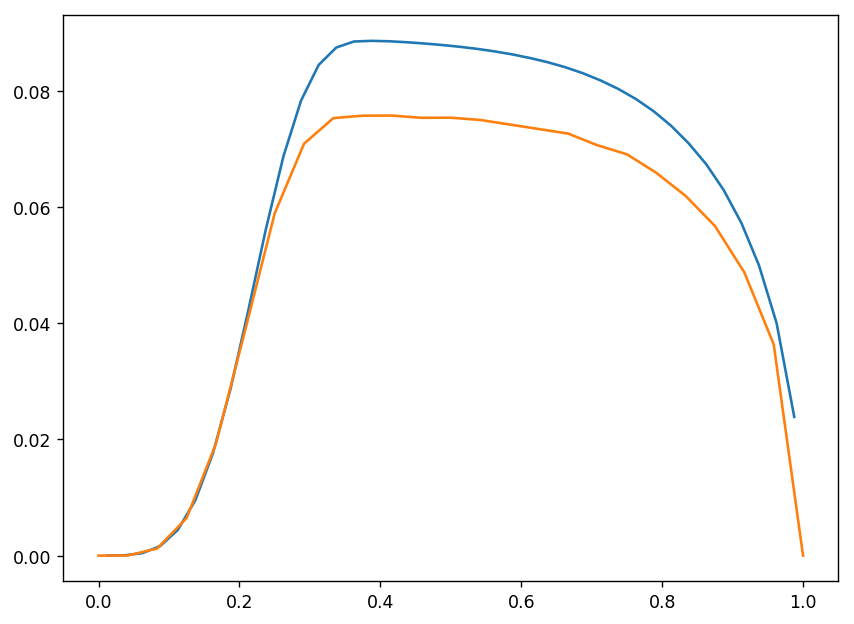

In [7]:
plt.figure(figsize=(8,6),dpi=125)
plt.plot(r,ft[::num_points_t]*(2*np.pi*r/Nb))
plt.plot(ct_sorensen[:,0], ct_sorensen[:,1])